In [1]:
#by Dogu Can ELCI
#please make comments :)

In [1]:
import pandas as pd

In [2]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)  

In [3]:
#Reading dataset
train_datas = pd.read_csv('cancer_data.csv')
train_datas.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


As we can see belove, "**Unnamed32**" has no any useful datas and "diagnosis"(y label) has no numeric datas.
So we have to fix them.

In [4]:
train_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                418 non-null    object 
 1   radius_mean              418 non-null    float64
 2   texture_mean             418 non-null    float64
 3   perimeter_mean           418 non-null    float64
 4   area_mean                418 non-null    float64
 5   smoothness_mean          418 non-null    float64
 6   compactness_mean         418 non-null    float64
 7   concavity_mean           418 non-null    float64
 8   concave points_mean      418 non-null    float64
 9   symmetry_mean            418 non-null    float64
 10  fractal_dimension_mean   418 non-null    float64
 11  radius_se                418 non-null    float64
 12  texture_se               418 non-null    float64
 13  perimeter_se             418 non-null    float64
 14  area_se                  4

Removing Unnamed:32 column from datas

In [5]:
train_datas.drop(columns={'Unnamed: 32'},inplace=True)

KeyError: "['Unnamed: 32'] not found in axis"

Converting diagnosis datas to numeric version

In [6]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
train_datas['diagnosis'] = lbl.fit_transform(train_datas['diagnosis'])
train_datas.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


'**id**' column is dropped and save in new variable for after.

In [7]:
train_datas_id = pd.DataFrame()
train_datas_id = train_datas['id']
train_datas.drop(columns={'id'},inplace=True)

KeyError: 'id'

Check if any imbalanced class labels problem exists.

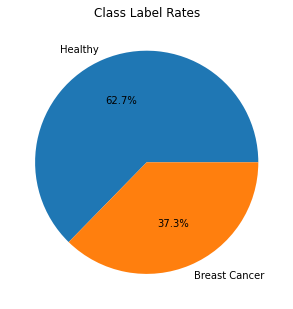

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,10))
plt.pie([len(train_datas['diagnosis'][train_datas['diagnosis']==0]),len(train_datas['diagnosis'][train_datas['diagnosis']==1])],
    autopct='%1.1f%%',
    labels=['Healthy','Breast Cancer'])
plt.title('Class Label Rates')
plt.show()

After the checking,there is a difference between two class but there is a probability that it still be useful for creating good
ai models without any changes, because difference is not too much.
If results will be bad, we will come back and try another techniques.

<AxesSubplot:>

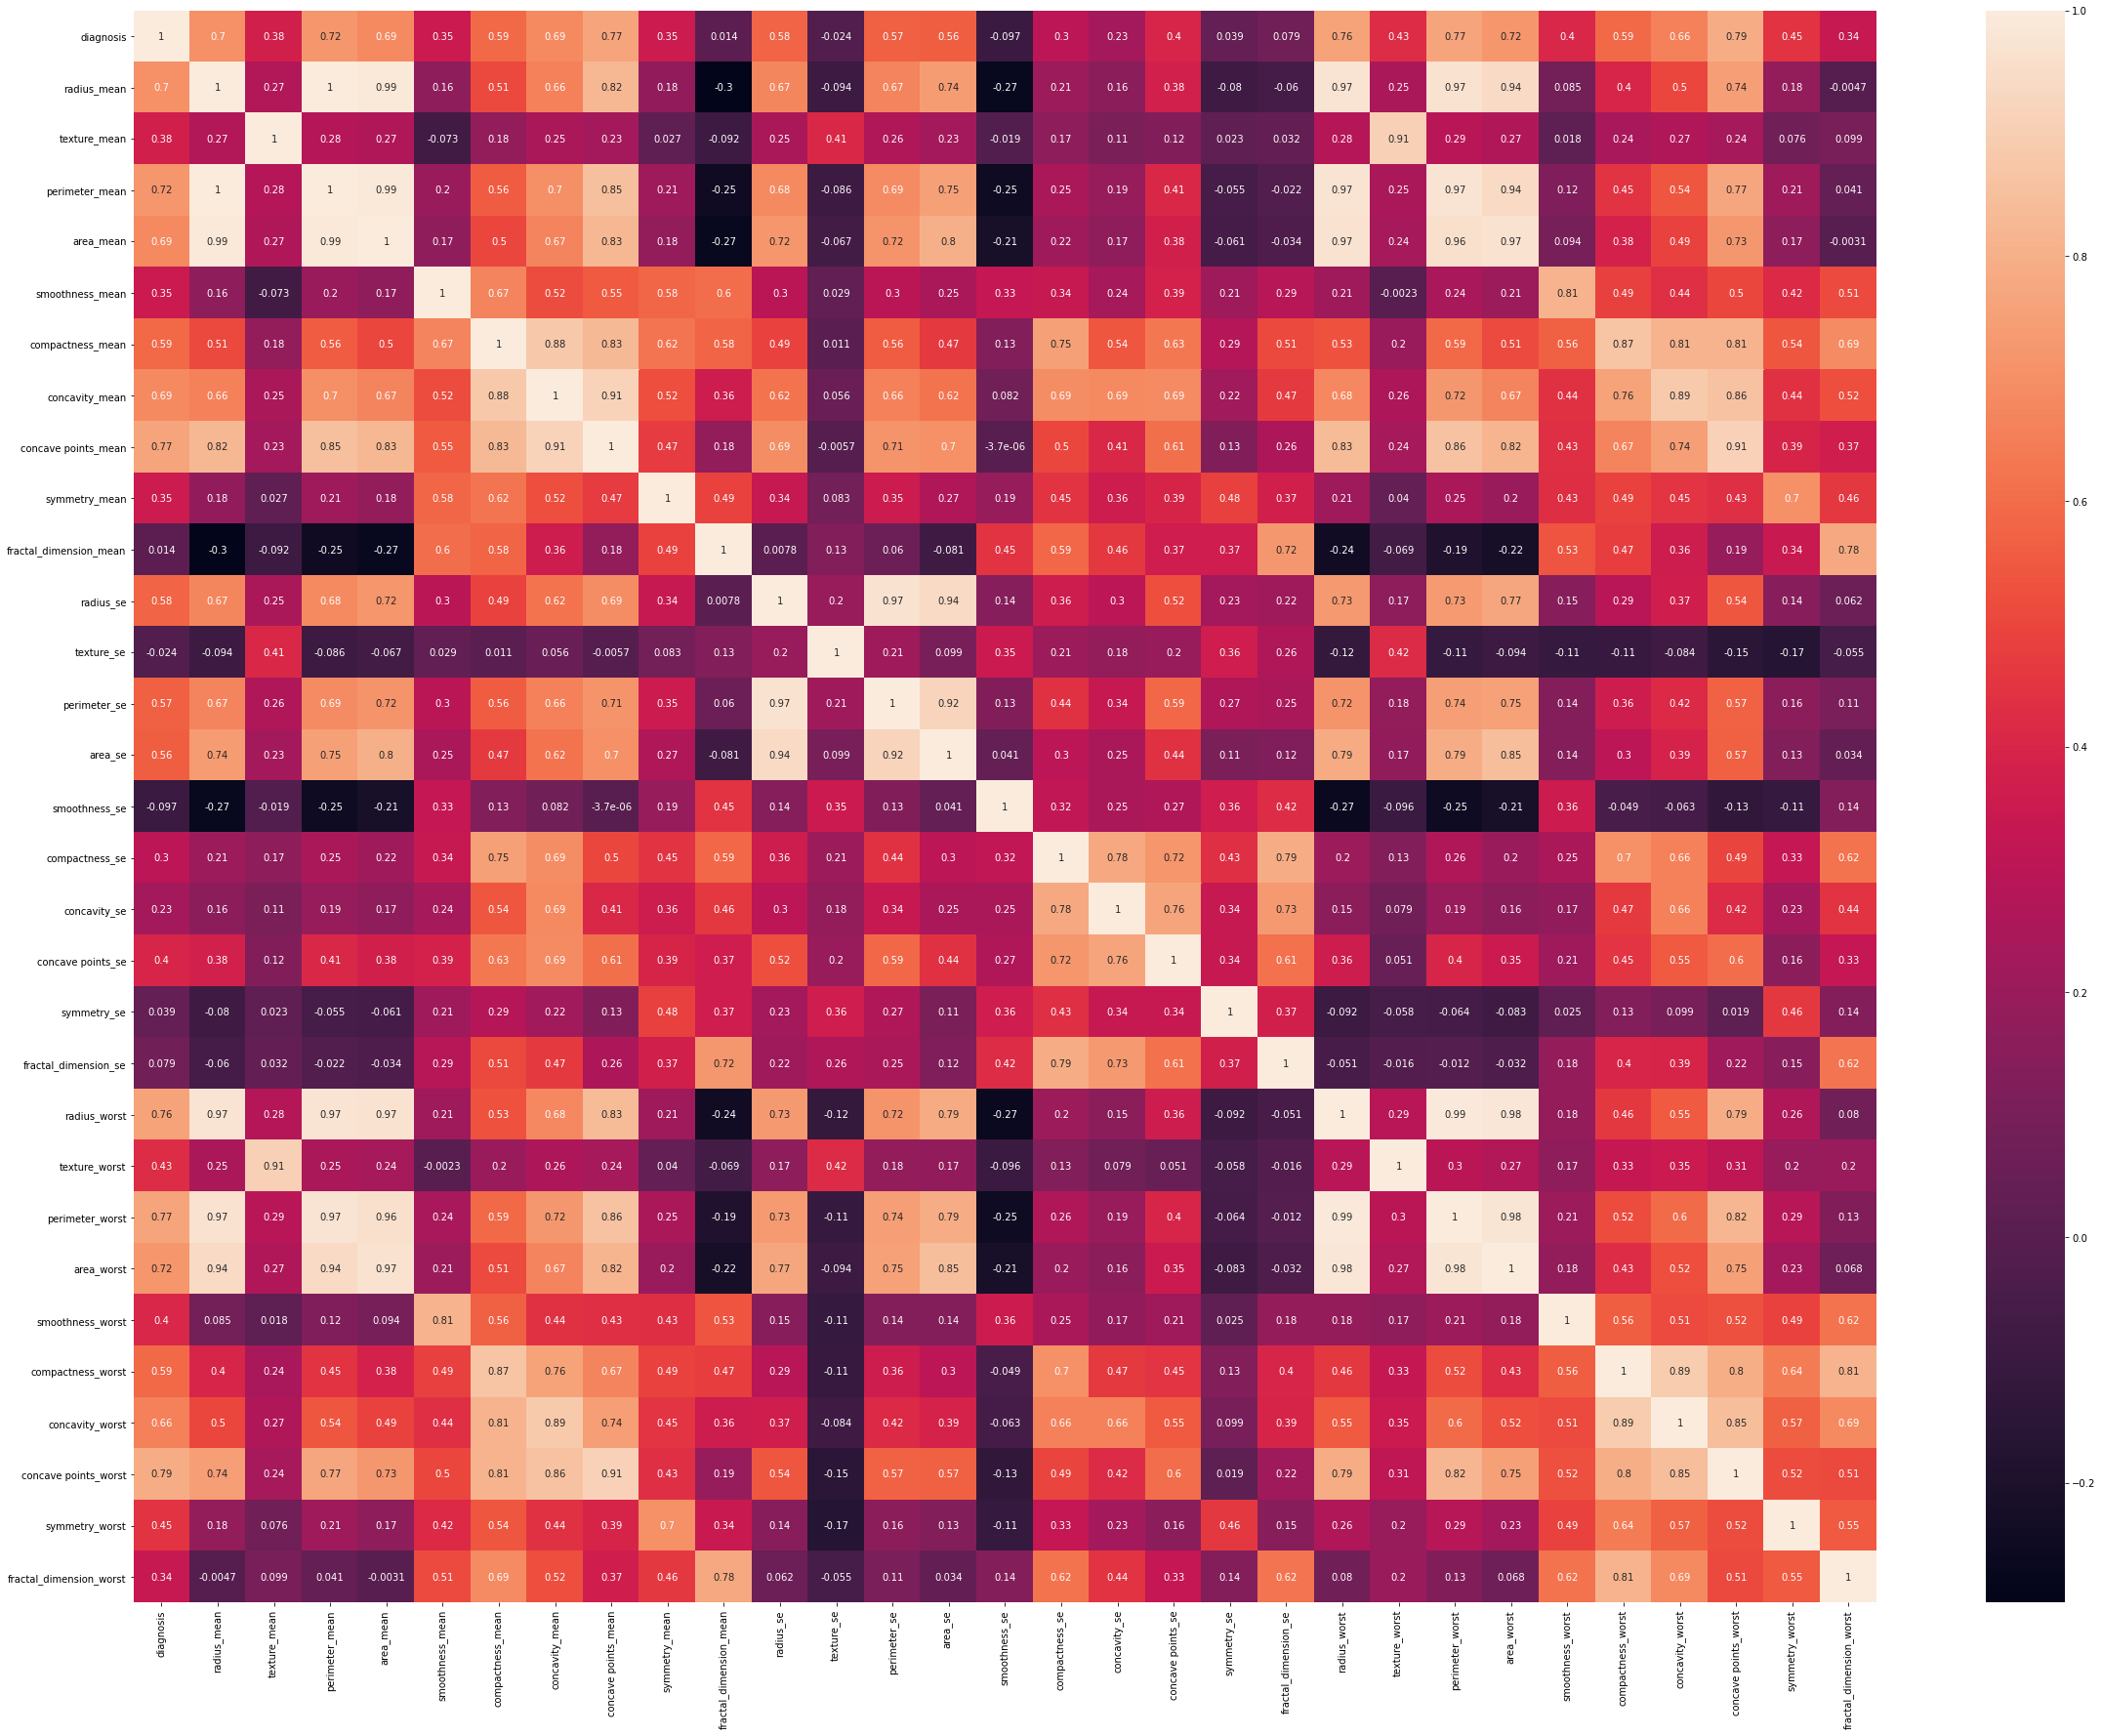

In [9]:
import seaborn as sb
corr = train_datas.corr()
plt.figure(figsize=(40,30))
sb.heatmap(corr,annot=True)

As you see, there are many features which has high correlation with each other. It means that some of them are redundant.
So we have to find and drop them. 

In [10]:
corr.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.703981,0.376431,0.717798,0.685527,0.350705,0.590266,0.685169,0.765503,0.353598,...,0.758741,0.426058,0.765585,0.716831,0.403676,0.592240,0.657847,0.790585,0.447428,0.338901
radius_mean,0.703981,1.000000,0.270886,0.997757,0.986925,0.164921,0.506118,0.659786,0.823669,0.178724,...,0.970703,0.246895,0.965082,0.941941,0.084680,0.401570,0.502553,0.743840,0.182609,-0.004686
texture_mean,0.376431,0.270886,1.000000,0.275607,0.266664,-0.072618,0.182496,0.246704,0.226515,0.026639,...,0.284414,0.908031,0.291951,0.268080,0.018267,0.243785,0.269306,0.239047,0.075533,0.099237
perimeter_mean,0.717798,0.997757,0.275607,1.000000,0.986087,0.203181,0.558009,0.700698,0.852672,0.214556,...,0.970740,0.252333,0.970828,0.942724,0.118019,0.445546,0.541436,0.771689,0.209763,0.041098
area_mean,0.685527,0.986925,0.266664,0.986087,1.000000,0.170051,0.500669,0.670307,0.825942,0.181816,...,0.967179,0.238067,0.962609,0.965587,0.094294,0.383373,0.490547,0.725696,0.165642,-0.003095


list1 keeps high correlated feature pairs.

In [11]:
list1= []
for i in range(len(corr)):
    for j in range(i):
        if corr.iloc[i,j] > 0.9:
            list1.append([i,j])
list1

[[3, 1],
 [4, 1],
 [4, 3],
 [8, 7],
 [13, 11],
 [14, 11],
 [14, 13],
 [21, 1],
 [21, 3],
 [21, 4],
 [22, 2],
 [23, 1],
 [23, 3],
 [23, 4],
 [23, 21],
 [24, 1],
 [24, 3],
 [24, 4],
 [24, 21],
 [24, 23],
 [28, 8]]

Reduntant features are dropped in here.

In [12]:
for i in list1:
    if len(train_datas.iloc[:,i[1]]) != 0:
        train_datas.iloc[:,i[1]] = 0
for j in train_datas.columns:
    if train_datas[j].sum() == 0:
        train_datas.drop(columns={j},inplace=True)
train_datas

,diagnosis,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.11840,0.27760,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,...,0.03003,0.006193,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,0.08474,0.07864,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,...,0.01389,0.003532,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,0.10960,0.15990,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,...,0.02250,0.004571,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,0.14250,0.28390,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,...,0.05963,0.009208,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,0.10030,0.13280,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,...,0.01756,0.005115,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,0.11100,0.11590,0.1726,0.05623,1.2560,158.70,0.010300,0.02891,0.05198,...,0.01114,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
414,1,0.09780,0.10340,0.1752,0.05533,2.4630,99.04,0.005769,0.02423,0.03950,...,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
415,1,0.08455,0.10230,0.1590,0.05648,1.0750,48.55,0.005903,0.03731,0.04730,...,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
416,1,0.11780,0.27700,0.2397,0.07016,1.5950,86.22,0.006522,0.06158,0.07117,...,0.02324,0.006185,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


After the preproccessing part, train and test subsets must be seperated.

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_datas.drop(columns={'diagnosis'}),train_datas['diagnosis'],test_size=0.2,random_state=32)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((334, 20), (84, 20), (334,), (84,))

Scaling process

In [14]:
#Scale train datas
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
#1-Standart Scaler
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.fit_transform(x_test)
#2-Standart MinMaxScaler
scaler = MinMaxScaler()
x_train_mm = scaler.fit_transform(x_train)
x_test_mm = scaler.fit_transform(x_test)
#3-Standart Normalizer
scaler = Normalizer()
x_train_n = scaler.fit_transform(x_train)
x_test_n = scaler.fit_transform(x_test)
#4-Standart RobustScaler
scaler = RobustScaler()
x_train_rb = scaler.fit_transform(x_train)
x_test_rb = scaler.fit_transform(x_test)

As results of Scaling part, it is determined that RobustScaler is the best way to scaling.(%96 cross-validation accuracy)

In [15]:
#Support Vector Machines model is used for select the best scale technique as cross-validation score of fit-svm classifier.
#1- SVM
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
model_svm = SVC()
scores = cross_val_score(model_svm,x_train_rb,y_train,cv=10)
scores , scores.mean()

(array([0.88235294, 0.97058824, 0.97058824, 0.97058824, 0.93939394,
        0.96969697, 0.96969697, 0.93939394, 0.93939394, 0.96969697]),
 0.9521390374331549)

In [16]:
#2-Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
scores = cross_val_score(model_naive,x_train_rb,y_train,cv=10)
scores, scores.mean()

(array([0.94117647, 0.97058824, 0.88235294, 0.91176471, 0.93939394,
        0.87878788, 0.96969697, 0.96969697, 0.90909091, 0.90909091]),
 0.928163992869875)

In [17]:
#3-Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
scores = cross_val_score(model_tree,x_train_rb,y_train,cv=10)
scores, scores.mean()

(array([0.94117647, 0.79411765, 0.85294118, 0.94117647, 0.96969697,
        0.78787879, 0.93939394, 0.93939394, 0.93939394, 0.93939394]),
 0.9044563279857398)

In [18]:
#4-Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
scores = cross_val_score(model_rf,x_train_rb,y_train,cv=10)
scores, scores.mean()

(array([0.91176471, 0.97058824, 0.91176471, 0.97058824, 0.93939394,
        0.93939394, 0.96969697, 0.96969697, 0.93939394, 0.93939394]),
 0.9461675579322639)

In [19]:
#5-KNeighbor
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(model_knn,x_train_rb,y_train,cv=10)
scores, scores.mean()

(array([0.85294118, 0.97058824, 0.97058824, 0.97058824, 0.93939394,
        0.90909091, 0.87878788, 0.90909091, 0.96969697, 0.93939394]),
 0.9310160427807487)

In [20]:
#6-Logistic Regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr
scores = cross_val_score(model_lr,x_train_rb,y_train,cv=10)
scores, scores.mean()

(array([0.91176471, 0.97058824, 1.        , 0.97058824, 0.93939394,
        0.96969697, 0.96969697, 0.93939394, 0.96969697, 1.        ]),
 0.9640819964349376)

In [21]:
#7-XGBClassifier
import xgboost as xgb
from xgboost import XGBClassifier
xgb.set_config(verbosity=0)
model_xgb = xgb.XGBClassifier()
scores = cross_val_score(model_xgb,x_train_rb,y_train,cv=10)
scores, scores.mean()

ModuleNotFoundError: No module named 'xgboost'

As results, best-performance models are:
1- XGBClassifier
2- SVM 
3- Logistic Regression

In [22]:
model_xgb = LogisticRegression()
model_xgb.fit(x_train_rb,y_train)
pred_test = model_xgb.predict(x_test_rb)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test.values,pred_test)
#3 model is trained and getting accuracy of them.
#As a result, Number3(Logistic Regression) has best accuracy point at test datas.

In [23]:
print('Last Accuracy of selected model is: %',round(acc,3))

Last Accuracy of selected model is: % 0.964


In [27]:
data = pd.read_csv('Test_Set.csv')
p = model_lr.predict(data)
print(p)
df = pd.DataFrame(p)
df.to_csv('file.csv',index=False)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.